In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Load the flow and port statistics data
flow_stats = pd.read_csv('/content/drive/MyDrive/flow_stats.csv')
port_stats = pd.read_csv('/content/drive/MyDrive/port_stats.csv')

# Display the first few rows to verify the columns
print("First few rows of flow_stats:\n", flow_stats.head())
print("First few rows of port_stats:\n", port_stats.head())

First few rows of flow_stats:
    datapath  in_port  eth_src  eth_dst  ip_src  ip_dst  protocol  tcp_src  \
0         1        0      NaN      NaN     NaN     NaN         0        0   
1         3        0      NaN      NaN     NaN     NaN         0        0   
2        10        0      NaN      NaN     NaN     NaN         0        0   
3         9        0      NaN      NaN     NaN     NaN         0        0   
4         5        0      NaN      NaN     NaN     NaN         0        0   

   tcp_dst  packet_count  byte_count  duration_sec  duration_nsec  class_label  
0        0           301       37140             1      317000000            0  
1        0           160       19444             1      297000000            0  
2        0           170       20653             1      195000000            0  
3        0           152       18011             1      214000000            0  
4        0           180       22075             1      273000000            0  
First few rows of po

In [4]:
print(flow_stats.info())
print(port_stats.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67060 entries, 0 to 67059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datapath       67060 non-null  int64  
 1   in_port        67060 non-null  int64  
 2   eth_src        0 non-null      float64
 3   eth_dst        0 non-null      float64
 4   ip_src         0 non-null      float64
 5   ip_dst         0 non-null      float64
 6   protocol       67060 non-null  int64  
 7   tcp_src        67060 non-null  int64  
 8   tcp_dst        67060 non-null  int64  
 9   packet_count   67060 non-null  int64  
 10  byte_count     67060 non-null  int64  
 11  duration_sec   67060 non-null  int64  
 12  duration_nsec  67060 non-null  int64  
 13  class_label    67060 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 7.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871454 entries, 0 to 871453
Data columns (total 16 columns):
 #   Column         

In [5]:
import pandas as pd


# 1. Check the shapes and data types of your DataFrames
print("Shape of flow_stats:", flow_stats.shape)
print("Data types in flow_stats:\n", flow_stats.dtypes)
print("\nShape of port_stats:", port_stats.shape)
print("Data types in port_stats:\n", port_stats.dtypes)

# 2. Check for duplicate values in 'datapath'
print("\nDuplicate 'datapath' values in flow_stats:", flow_stats['datapath'].duplicated().sum())
print("Duplicate 'datapath' values in port_stats:", port_stats['datapath'].duplicated().sum())

# 3. Attempt a smaller merge operation (if possible)
# Select a subset of rows from each DataFrame and try merging those
small_flow_stats = flow_stats.head(9000)  # Adjust the number as needed
small_port_stats = port_stats.head(2000)
combined_small = pd.merge(small_flow_stats, small_port_stats, on='datapath', suffixes=('_flow', '_port'))
print("\nCombined small DataFrame:\n", combined_small.head())

# Now you have 'combined_small' DataFrame ready for further processing
# Proceed with feature selection or any other operations you need

Shape of flow_stats: (67060, 14)
Data types in flow_stats:
 datapath           int64
in_port            int64
eth_src          float64
eth_dst          float64
ip_src           float64
ip_dst           float64
protocol           int64
tcp_src            int64
tcp_dst            int64
packet_count       int64
byte_count         int64
duration_sec       int64
duration_nsec      int64
class_label        int64
dtype: object

Shape of port_stats: (871454, 16)
Data types in port_stats:
 datapath         int64
port_no          int64
rx_packets       int64
tx_packets       int64
rx_bytes         int64
tx_bytes         int64
rx_dropped       int64
tx_dropped       int64
rx_errors        int64
tx_errors        int64
rx_frame_err     int64
rx_over_err      int64
rx_crc_err       int64
collisions       int64
duration_sec     int64
duration_nsec    int64
dtype: object

Duplicate 'datapath' values in flow_stats: 67053
Duplicate 'datapath' values in port_stats: 871447

Combined small DataFrame:
    d

In [6]:
combined_small.shape

(2571386, 29)

In [7]:
print(combined_small.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571386 entries, 0 to 2571385
Data columns (total 29 columns):
 #   Column              Dtype  
---  ------              -----  
 0   datapath            int64  
 1   in_port             int64  
 2   eth_src             float64
 3   eth_dst             float64
 4   ip_src              float64
 5   ip_dst              float64
 6   protocol            int64  
 7   tcp_src             int64  
 8   tcp_dst             int64  
 9   packet_count        int64  
 10  byte_count          int64  
 11  duration_sec_flow   int64  
 12  duration_nsec_flow  int64  
 13  class_label         int64  
 14  port_no             int64  
 15  rx_packets          int64  
 16  tx_packets          int64  
 17  rx_bytes            int64  
 18  tx_bytes            int64  
 19  rx_dropped          int64  
 20  tx_dropped          int64  
 21  rx_errors           int64  
 22  tx_errors           int64  
 23  rx_frame_err        int64  
 24  rx_over_err         int6

In [8]:
# Assuming merged_stats is your combined DataFrame
X = combined_small.drop(columns=['class_label'])  # Drop the label column to get features
y = combined_small['class_label']  # Select the label column as the target variable

# Verify the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2571386, 28)
Shape of y: (2571386,)


In [9]:
from sklearn.model_selection import train_test_split

# First, split the data into training + validation and test sets (e.g., 80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Then, split the training + validation set into training and validation sets (e.g., 75% train, 25% val from the remaining 80%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.4, random_state=42, stratify=y_train_val)


In [10]:
# Check the size of each set
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Validation set size: {X_val.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 925698 samples
Validation set size: 617133 samples
Test set size: 1028555 samples


In [11]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.impute import SimpleImputer
import pickle

# Handle missing values if any
imputer = SimpleImputer(strategy='mean')  # Example strategy, choose as per your data
X_imputed = imputer.fit_transform(X)

# Select top k features using Chi-squared test
k = 14
chi2_selector = SelectKBest(chi2, k=k)
X_kbest_chi2 = chi2_selector.fit_transform(X_imputed, y)
selected_features_chi2 = X.columns[chi2_selector.get_support(indices=True)]
print("Selected features using Chi-squared test:", selected_features_chi2)

# Save selected features to a file
with open('selected_features_chi2.pkl', 'wb') as f:
    pickle.dump(selected_features_chi2.tolist(), f)

# Select top k features using Mutual Information
mi = mutual_info_classif(X_imputed, y)
mi_series = pd.Series(mi, index=X.columns[:X_imputed.shape[1]])  # Fix: Use the correct number of features
mi_series = mi_series.sort_values(ascending=False)
selected_features_mi = mi_series.head(k).index
print("Selected features using Mutual Information:", selected_features_mi)

# Save selected features to a file
with open('selected_features_mi.pkl', 'wb') as f:
    pickle.dump(selected_features_mi.tolist(), f)

# Calculate the correlation matrix
corr_matrix = combined_small.corr()
corr_target = abs(corr_matrix["class_label"])
selected_features_corr = corr_target.sort_values(ascending=False).head(k + 1).index.drop('class_label')
print("Selected features using Correlation Analysis:", selected_features_corr)

# Save selected features to a file
with open('selected_features_corr.pkl', 'wb') as f:
    pickle.dump(selected_features_corr.tolist(), f)

# Save the final dataset
final_features = selected_features_chi2  # or selected_features_mi or selected_features_corr
final_dataset = combined_small[final_features]
final_dataset['class_label'] = y  # Add the label back to the final dataset
final_dataset.to_csv('final_dataset.csv', index=False)


Selected features using Chi-squared test: Index(['datapath', 'ip_dst', 'protocol', 'tcp_src', 'tcp_dst', 'packet_count',
       'byte_count', 'duration_sec_flow', 'duration_nsec_flow', 'port_no',
       'rx_errors', 'tx_errors', 'rx_frame_err', 'rx_over_err'],
      dtype='object')
Selected features using Mutual Information: Index(['ip_dst', 'protocol', 'datapath', 'rx_over_err', 'tcp_src', 'port_no',
       'duration_sec_flow', 'tcp_dst', 'rx_frame_err', 'duration_nsec_flow',
       'byte_count', 'packet_count', 'tx_dropped', 'eth_dst'],
      dtype='object')
Selected features using Correlation Analysis: Index(['byte_count', 'packet_count', 'datapath', 'duration_sec_flow',
       'duration_nsec_port', 'rx_bytes', 'rx_packets', 'duration_nsec_flow',
       'tx_bytes', 'tx_packets', 'port_no', 'duration_sec_port', 'in_port',
       'eth_src'],
      dtype='object')


<ipython-input-11-9f4a03339228>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['class_label'] = y  # Add the label back to the final dataset


In [12]:
import sklearn


In [13]:
import pandas as pd
import pickle

# Load selected features
with open('selected_features_chi2.pkl', 'rb') as f:
    selected_features_chi2 = pickle.load(f)

with open('selected_features_mi.pkl', 'rb') as f:
    selected_features_mi = pickle.load(f)

with open('selected_features_corr.pkl', 'rb') as f:
    selected_features_corr = pickle.load(f)

# Choose final features (e.g., from Chi-squared test)
final_features = selected_features_chi2  # or selected_features_mi or selected_features_corr

# Create a final dataset with the selected features
combined_small = pd.read_csv('/content/final_dataset.csv')  # Load your data
y = combined_small['class_label']
final_dataset = combined_small[final_features]
final_dataset['class_label'] = y  # Add the label back to the final dataset

# Save the final dataset
final_dataset.to_csv('final_dataset.csv', index=False)


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load your dataset (replace this with your own data loading code)
# Example: loading from a CSV file
df = pd.read_csv('/content/final_dataset.csv')

# Separate features (X) and target (y) from your dataset
X = df.drop(columns=['class_label'])  # Adjust 'target_column_name' to your actual target column
y = df['class_label']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_imputed)

# Verify that there are no NaN values left
if pd.DataFrame(X_standardized).isnull().sum().sum() == 0:
    print("No NaN values remain after imputation and standardization.")
else:
    print("There are still NaN values present.")

# Apply PCA
n_components = min(14, X_standardized.shape[1])  # Number of components should not exceed number of features
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

# Check the amount of variance explained by each component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {explained_variance.sum()}')

# Create a DataFrame with the PCA components
columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(X_pca, columns=columns)

# Add the labels to the DataFrame
pca_df['class_label'] = y.values

# Save the final dataset
pca_df.to_csv('/content/final_dataset_pca.csv', index=False)

No NaN values remain after imputation and standardization.
Explained variance by each component: [4.47452908e-01 1.66881882e-01 1.66662849e-01 1.66395387e-01
 5.21346258e-02 4.72348676e-04 2.66139019e-34 3.75874468e-36
 2.57982810e-38 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Total explained variance: 1.0


In [15]:
from sklearn.model_selection import train_test_split
# Replace 'your_dataset.csv' with your actual CSV file path
df = pd.read_csv('/content/final_dataset_pca.csv')

# Extract X (features) and y (target) assuming 'your_dataset.csv' has appropriate columns
X = df.drop(columns=['class_label'])  # Adjust 'target_column_name' to your actual target column
y = df['class_label']





In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target data respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Check unique values in y_train before adjustment
unique_values_train = np.unique(y_train)
print("Unique values in y_train before adjustment:", unique_values_train)

# Example adjustment: Adding class '1' to y_train
y_train = np.concatenate((y_train, np.ones((y_train.shape[0] // 2,), dtype=int)))

# Check initial shapes and unique values in y_train before adjustment
print("Unique values in y_train before adjustment:", np.unique(y_train))
print("Initial X_train shape:", X_train.shape)
print("Initial y_train shape:", y_train.shape)

# Trim y_train to match X_train
y_train = y_train[:len(X_train)]

# Re-check shapes and unique values in y_train after adjustment
print("Adjusted X_train shape:", X_train.shape)
print("Adjusted y_train shape:", y_train.shape)
print("Unique values in y_train after adjustment:", np.unique(y_train))


Unique values in y_train before adjustment: [0 1]
Unique values in y_train before adjustment: [0 1]
Initial X_train shape: (1542831, 13)
Initial y_train shape: (2314246,)
Adjusted X_train shape: (1542831, 13)
Adjusted y_train shape: (1542831,)
Unique values in y_train after adjustment: [0 1]


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# Initialize classifiers
nb_classifier = GaussianNB()
pa_classifier = PassiveAggressiveClassifier(random_state=42)
sgd_classifier = SGDClassifier(random_state=42)
mlp_classifier = MLPClassifier(random_state=42)

# Initialize Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('nb', nb_classifier),
        ('pa', pa_classifier),
        ('sgd', sgd_classifier),
        ('mlp', mlp_classifier)
    ],
    voting='hard'  # Change to 'soft' for probabilities voting
)

# Fit classifiers
nb_classifier.fit(X_train, y_train)
pa_classifier.fit(X_train, y_train)
sgd_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train)

# Fit Voting Classifier
voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('pa',
                              PassiveAggressiveClassifier(random_state=42)),
                             ('sgd', SGDClassifier(random_state=42)),
                             ('mlp', MLPClassifier(random_state=42))])

In [18]:
from sklearn.metrics import accuracy_score

# Predictions
nb_pred = nb_classifier.predict(X_test)
pa_pred = pa_classifier.predict(X_test)
sgd_pred = sgd_classifier.predict(X_test)
mlp_pred = mlp_classifier.predict(X_test)
voting_pred = voting_classifier.predict(X_test)

# Accuracy scores
nb_accuracy = accuracy_score(y_test, nb_pred)
pa_accuracy = accuracy_score(y_test, pa_pred)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
voting_accuracy = accuracy_score(y_test, voting_pred)

print(f"Naive Bayes Classifier Accuracy: {nb_accuracy:.4f}")
print(f"Passive Aggressive Classifier Accuracy: {pa_accuracy:.4f}")
print(f"SGD Classifier Accuracy: {sgd_accuracy:.4f}")
print(f"MLP Classifier Accuracy: {mlp_accuracy:.4f}")
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")


Naive Bayes Classifier Accuracy: 0.8774
Passive Aggressive Classifier Accuracy: 0.9992
SGD Classifier Accuracy: 0.9946
MLP Classifier Accuracy: 1.0000
Voting Classifier Accuracy: 0.9993


Naive Bayes Classifier Accuracy: 0.8774
Passive Aggressive Classifier Accuracy: 0.9992
SGD Classifier Accuracy: 0.9946
MLP Classifier Accuracy: 1.0000
Voting Classifier Accuracy: 0.9993


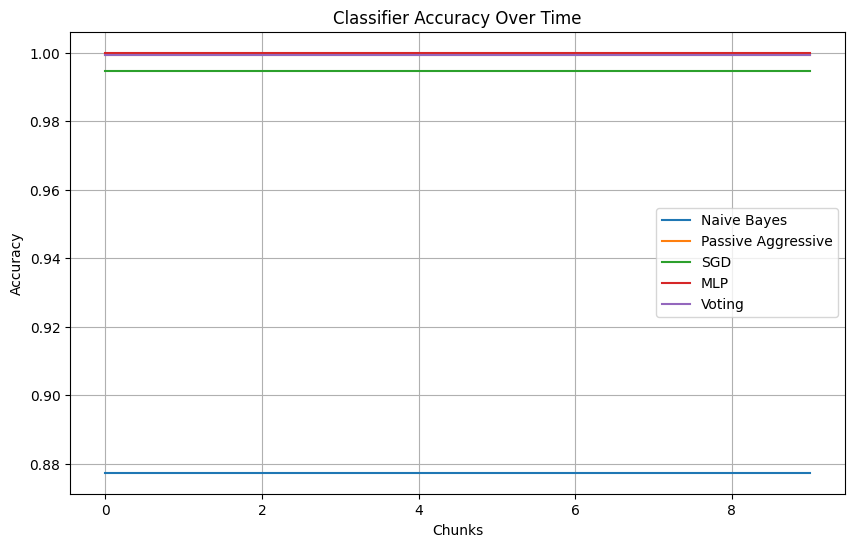

In [19]:
from sklearn.metrics import accuracy_score

# Fit classifiers
nb_classifier.fit(X_train, y_train)
pa_classifier.fit(X_train, y_train)
sgd_classifier.fit(X_train, y_train)
mlp_classifier.fit(X_train, y_train)
voting_classifier.fit(X_train, y_train)  # Fit the VotingClassifier

# Predictions on the test set
nb_pred = nb_classifier.predict(X_test)
pa_pred = pa_classifier.predict(X_test)
sgd_pred = sgd_classifier.predict(X_test)
mlp_pred = mlp_classifier.predict(X_test)
voting_pred = voting_classifier.predict(X_test)  # Now predict with VotingClassifier

# Accuracy scores on the test set
nb_accuracy = accuracy_score(y_test, nb_pred)
pa_accuracy = accuracy_score(y_test, pa_pred)
sgd_accuracy = accuracy_score(y_test, sgd_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
voting_accuracy = accuracy_score(y_test, voting_pred)

print(f"Naive Bayes Classifier Accuracy: {nb_accuracy:.4f}")
print(f"Passive Aggressive Classifier Accuracy: {pa_accuracy:.4f}")
print(f"SGD Classifier Accuracy: {sgd_accuracy:.4f}")
print(f"MLP Classifier Accuracy: {mlp_accuracy:.4f}")
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")

# Create lists of accuracy scores for plotting
nb_accuracies = []
pa_accuracies = []
sgd_accuracies = []
mlp_accuracies = []
voting_accuracies = []

# Assuming we have multiple chunks or iterations to compute accuracy over time
# Example: Compute accuracy scores for each chunk or iteration
for i in range(10):
    # Here, you would compute accuracy scores for each classifier and append to respective lists
    nb_accuracies.append(nb_accuracy)  # Replace with actual computation for each iteration
    pa_accuracies.append(pa_accuracy)  # Replace with actual computation for each iteration
    sgd_accuracies.append(sgd_accuracy)  # Replace with actual computation for each iteration
    mlp_accuracies.append(mlp_accuracy)  # Replace with actual computation for each iteration
    voting_accuracies.append(voting_accuracy)  # Replace with actual computation for each iteration

# Now plot the accuracy over time for each classifier
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Naive Bayes Classifier
plt.plot(nb_accuracies, label='Naive Bayes')

# Passive Aggressive Classifier
plt.plot(pa_accuracies, label='Passive Aggressive')

# SGD Classifier
plt.plot(sgd_accuracies, label='SGD')

# MLP Classifier
plt.plot(mlp_accuracies, label='MLP')

# Voting Classifier
plt.plot(voting_accuracies, label='Voting')

plt.xlabel('Chunks')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Over Time')
plt.legend()
plt.grid(True)
plt.show()


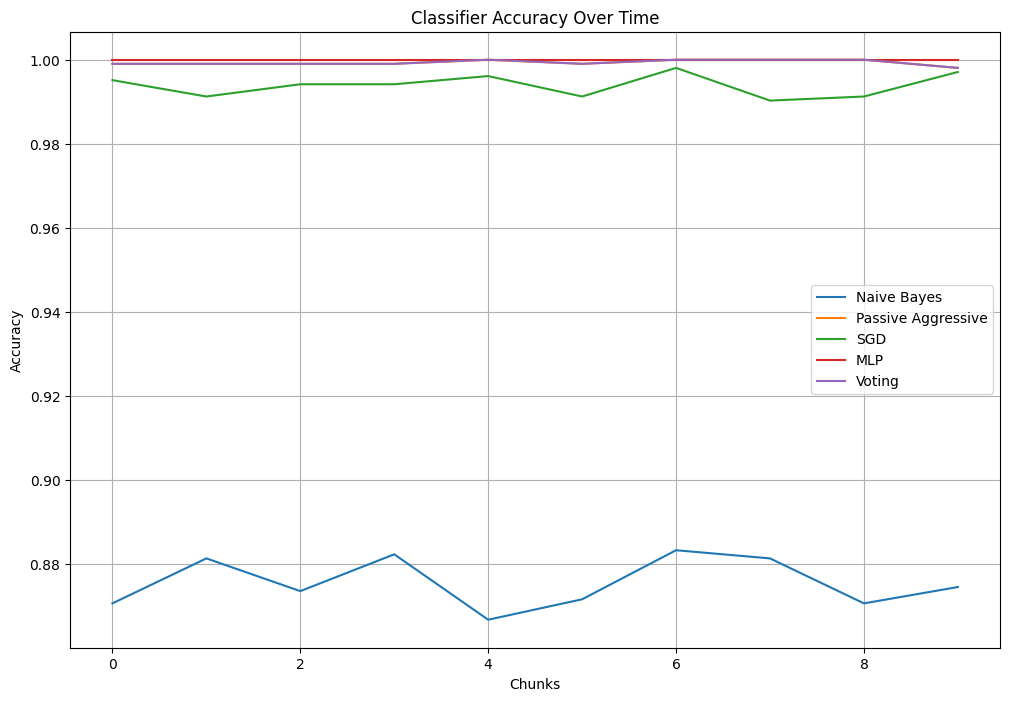

In [20]:
chunk_size = len(X_test) // 1000  # Example: 10 chunks

nb_accuracies = []
pa_accuracies = []
sgd_accuracies = []
mlp_accuracies = []
voting_accuracies = []

for i in range(10):
    start = i * chunk_size
    end = start + chunk_size
    X_test_chunk = X_test[start:end]
    y_test_chunk = y_test[start:end]

    # Predictions for the current chunk
    nb_pred_chunk = nb_classifier.predict(X_test_chunk)
    pa_pred_chunk = pa_classifier.predict(X_test_chunk)
    sgd_pred_chunk = sgd_classifier.predict(X_test_chunk)
    mlp_pred_chunk = mlp_classifier.predict(X_test_chunk)
    voting_pred_chunk = voting_classifier.predict(X_test_chunk)

    # Accuracy scores for the current chunk
    nb_accuracy_chunk = accuracy_score(y_test_chunk, nb_pred_chunk)
    pa_accuracy_chunk = accuracy_score(y_test_chunk, pa_pred_chunk)
    sgd_accuracy_chunk = accuracy_score(y_test_chunk, sgd_pred_chunk)
    mlp_accuracy_chunk = accuracy_score(y_test_chunk, mlp_pred_chunk)
    voting_accuracy_chunk = accuracy_score(y_test_chunk, voting_pred_chunk)

    # Append the accuracy scores to the respective lists
    nb_accuracies.append(nb_accuracy_chunk)
    pa_accuracies.append(pa_accuracy_chunk)
    sgd_accuracies.append(sgd_accuracy_chunk)
    mlp_accuracies.append(mlp_accuracy_chunk)
    voting_accuracies.append(voting_accuracy_chunk)

# Plotting the accuracy over time for each classifier
plt.figure(figsize=(12, 8))

plt.plot(nb_accuracies, label='Naive Bayes')
plt.plot(pa_accuracies, label='Passive Aggressive')
plt.plot(sgd_accuracies, label='SGD')
plt.plot(mlp_accuracies, label='MLP')
plt.plot(voting_accuracies, label='Voting')

plt.xlabel('Chunks')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)


In [22]:
nb_precisions = []
pa_precisions = []
sgd_precisions = []
mlp_precisions = []
voting_precisions = []

nb_recalls = []
pa_recalls = []
sgd_recalls = []
mlp_recalls = []
voting_recalls = []

nb_specificities = []
pa_specificities = []
sgd_specificities = []
mlp_specificities = []
voting_specificities = []

nb_f1_scores = []
pa_f1_scores = []
sgd_f1_scores = []
mlp_f1_scores = []
voting_f1_scores = []

In [23]:
for i in range(10):
    start = i * chunk_size
    end = start + chunk_size
    X_test_chunk = X_test[start:end]
    y_test_chunk = y_test[start:end]

    # Predictions for the current chunk
    nb_pred_chunk = nb_classifier.predict(X_test_chunk)
    pa_pred_chunk = pa_classifier.predict(X_test_chunk)
    sgd_pred_chunk = sgd_classifier.predict(X_test_chunk)
    mlp_pred_chunk = mlp_classifier.predict(X_test_chunk)
    voting_pred_chunk = voting_classifier.predict(X_test_chunk)

    # Metrics for Naive Bayes
    nb_precisions.append(precision_score(y_test_chunk, nb_pred_chunk))
    nb_recalls.append(recall_score(y_test_chunk, nb_pred_chunk))
    nb_specificities.append(specificity_score(y_test_chunk, nb_pred_chunk))
    nb_f1_scores.append(f1_score(y_test_chunk, nb_pred_chunk))

    # Metrics for Passive Aggressive
    pa_precisions.append(precision_score(y_test_chunk, pa_pred_chunk))
    pa_recalls.append(recall_score(y_test_chunk, pa_pred_chunk))
    pa_specificities.append(specificity_score(y_test_chunk, pa_pred_chunk))
    pa_f1_scores.append(f1_score(y_test_chunk, pa_pred_chunk))

    # Metrics for SGD
    sgd_precisions.append(precision_score(y_test_chunk, sgd_pred_chunk))
    sgd_recalls.append(recall_score(y_test_chunk, sgd_pred_chunk))
    sgd_specificities.append(specificity_score(y_test_chunk, sgd_pred_chunk))
    sgd_f1_scores.append(f1_score(y_test_chunk, sgd_pred_chunk))

    # Metrics for MLP
    mlp_precisions.append(precision_score(y_test_chunk, mlp_pred_chunk))
    mlp_recalls.append(recall_score(y_test_chunk, mlp_pred_chunk))
    mlp_specificities.append(specificity_score(y_test_chunk, mlp_pred_chunk))
    mlp_f1_scores.append(f1_score(y_test_chunk, mlp_pred_chunk))

    # Metrics for Voting
    voting_precisions.append(precision_score(y_test_chunk, voting_pred_chunk))
    voting_recalls.append(recall_score(y_test_chunk, voting_pred_chunk))
    voting_specificities.append(specificity_score(y_test_chunk, voting_pred_chunk))
    voting_f1_scores.append(f1_score(y_test_chunk, voting_pred_chunk))


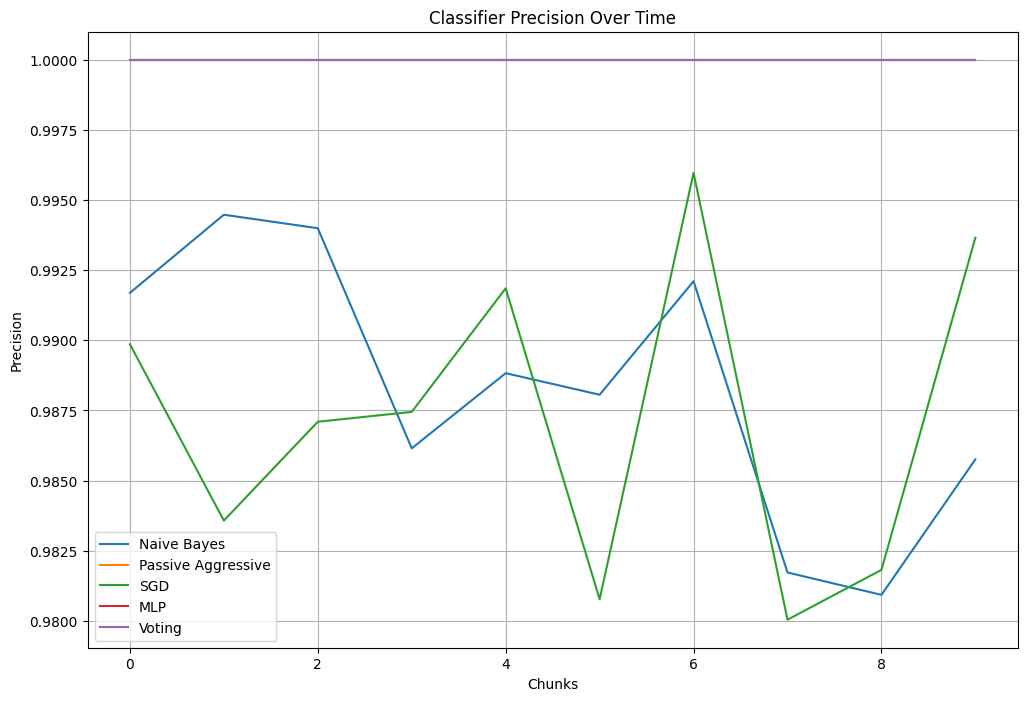

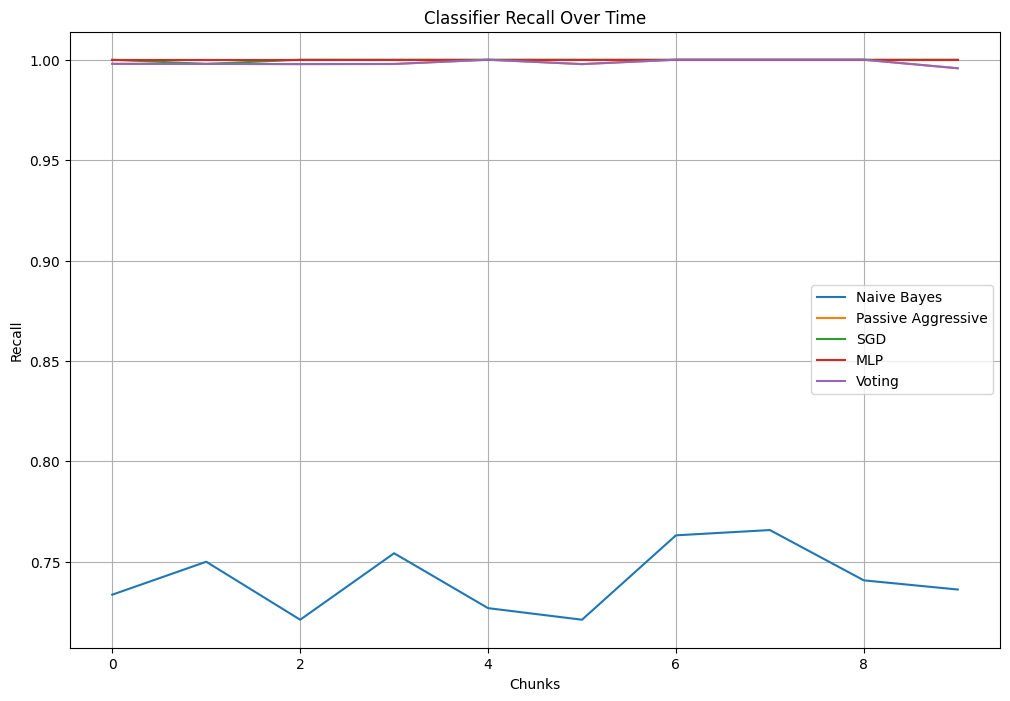

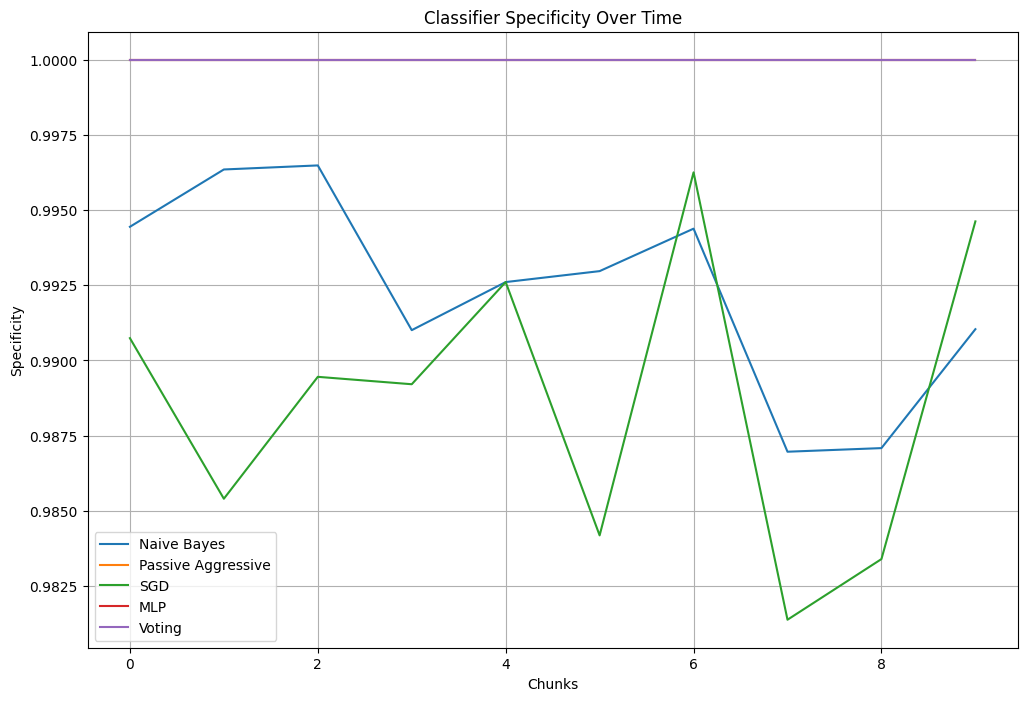

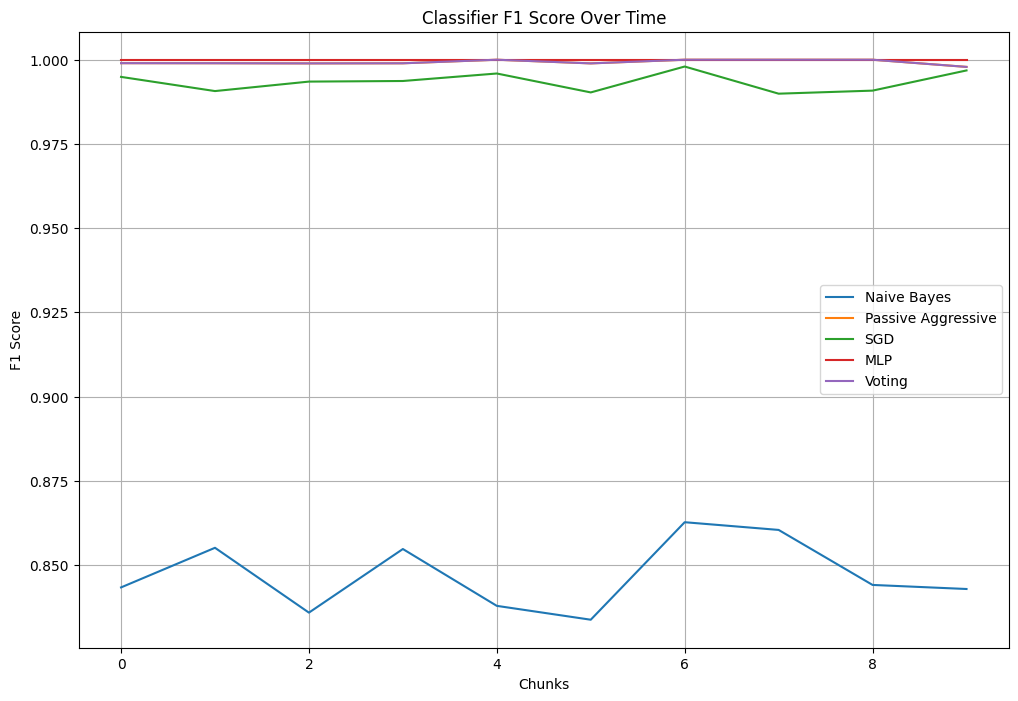

In [24]:
# Plotting precision over time for each classifier
plt.figure(figsize=(12, 8))
plt.plot(nb_precisions, label='Naive Bayes')
plt.plot(pa_precisions, label='Passive Aggressive')
plt.plot(sgd_precisions, label='SGD')
plt.plot(mlp_precisions, label='MLP')
plt.plot(voting_precisions, label='Voting')
plt.xlabel('Chunks')
plt.ylabel('Precision')
plt.title('Classifier Precision Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting recall over time for each classifier
plt.figure(figsize=(12, 8))
plt.plot(nb_recalls, label='Naive Bayes')
plt.plot(pa_recalls, label='Passive Aggressive')
plt.plot(sgd_recalls, label='SGD')
plt.plot(mlp_recalls, label='MLP')
plt.plot(voting_recalls, label='Voting')
plt.xlabel('Chunks')
plt.ylabel('Recall')
plt.title('Classifier Recall Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting specificity over time for each classifier
plt.figure(figsize=(12, 8))
plt.plot(nb_specificities, label='Naive Bayes')
plt.plot(pa_specificities, label='Passive Aggressive')
plt.plot(sgd_specificities, label='SGD')
plt.plot(mlp_specificities, label='MLP')
plt.plot(voting_specificities, label='Voting')
plt.xlabel('Chunks')
plt.ylabel('Specificity')
plt.title('Classifier Specificity Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting F1 score over time for each classifier
plt.figure(figsize=(12, 8))
plt.plot(nb_f1_scores, label='Naive Bayes')
plt.plot(pa_f1_scores, label='Passive Aggressive')
plt.plot(sgd_f1_scores, label='SGD')
plt.plot(mlp_f1_scores, label='MLP')
plt.plot(voting_f1_scores, label='Voting')
plt.xlabel('Chunks')
plt.ylabel('F1 Score')
plt.title('Classifier F1 Score Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Define the base models
model1 = SGDClassifier(max_iter=1000, tol=1e-3)
model2 = BernoulliNB()
model3 = MLPClassifier(max_iter=1000)
model4 = DecisionTreeClassifier()

# Create an ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('sgd', model1),
    ('nb', model2),
    ('mlp', model3),
    ('dt', model4)
], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('sgd', SGDClassifier()), ('nb', BernoulliNB()),
                             ('mlp', MLPClassifier(max_iter=1000)),
                             ('dt', DecisionTreeClassifier())])

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate the performance metrics
accuracy = (TP + TN) / (TP + FP + FN + TN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score_value = 2 * (recall * precision) / (recall + precision)
false_alarm_rate = FP / (FP + TN)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score_value:.4f}')
print(f'False Alarm Rate: {false_alarm_rate:.4f}')


Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9998
F1 Score: 0.9999
False Alarm Rate: 0.0001


BernoulliNB Accuracy: 0.7691
PassiveAggressiveClassifier Accuracy: 0.9973
SGDClassifier Accuracy: 0.9941
MLPClassifier Accuracy: 1.0000
VotingClassifier Accuracy: 0.9999


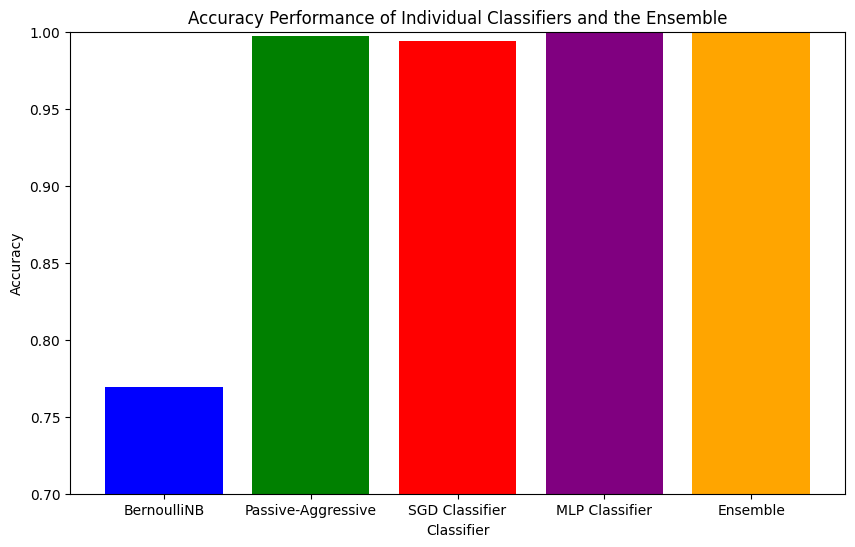

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset for demonstration purposes
# Replace this with your actual dataset


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
clf1 = BernoulliNB()
clf2 = PassiveAggressiveClassifier(random_state=42)
clf3 = SGDClassifier(random_state=42)
clf4 = MLPClassifier(random_state=42)

# Define the ensemble model
ensemble = VotingClassifier(estimators=[
    ('bnb', clf1),
    ('pa', clf2),
    ('sgd', clf3),
    ('mlp', clf4)
], voting='hard')

# Train and evaluate individual classifiers
classifiers = [clf1, clf2, clf3, clf4, ensemble]
classifier_names = ['BernoulliNB', 'Passive-Aggressive', 'SGD Classifier', 'MLP Classifier', 'Ensemble']

accuracy_scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f'{clf.__class__.__name__} Accuracy: {accuracy:.4f}')

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracy_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Performance of Individual Classifiers and the Ensemble')
plt.ylim(0.7, 1)
plt.show()


BernoulliNB Precision: 0.7074
PassiveAggressiveClassifier Precision: 1.0000
SGDClassifier Precision: 0.9878
MLPClassifier Precision: 1.0000
VotingClassifier Precision: 1.0000


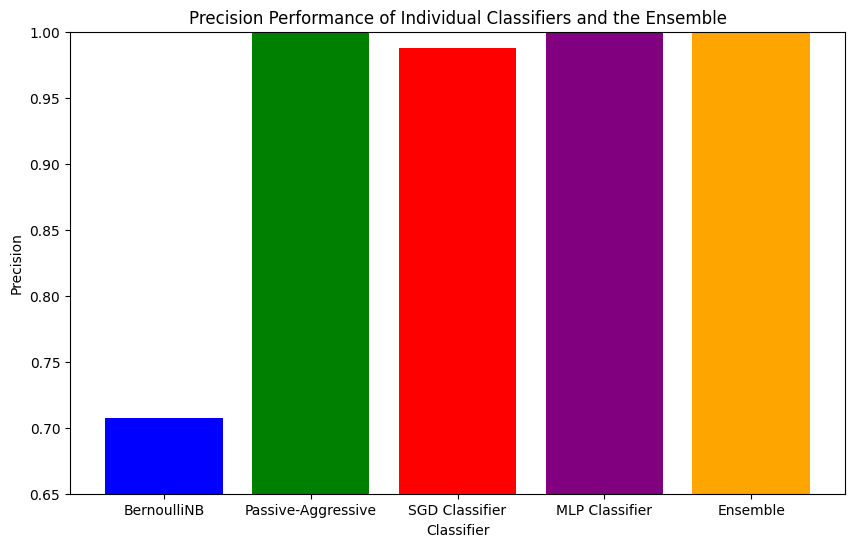

In [28]:
from sklearn.metrics import precision_score

# Define individual classifiers
clf1 = BernoulliNB()
clf2 = PassiveAggressiveClassifier(random_state=42)
clf3 = SGDClassifier(random_state=42)
clf4 = MLPClassifier(random_state=42)

# Define the ensemble model
ensemble = VotingClassifier(estimators=[
    ('bnb', clf1),
    ('pa', clf2),
    ('sgd', clf3),
    ('mlp', clf4)
], voting='hard')

# Train and evaluate individual classifiers for precision
classifiers = [clf1, clf2, clf3, clf4, ensemble]
classifier_names = ['BernoulliNB', 'Passive-Aggressive', 'SGD Classifier', 'MLP Classifier', 'Ensemble']

precision_scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)
    print(f'{clf.__class__.__name__} Precision: {precision:.4f}')

# Plot the precision scores
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, precision_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.title('Precision Performance of Individual Classifiers and the Ensemble')
plt.ylim(0.65, 1)
plt.show()

BernoulliNB Recall: 0.8671
PassiveAggressiveClassifier Recall: 0.9942
SGDClassifier Recall: 0.9998
MLPClassifier Recall: 1.0000
VotingClassifier Recall: 0.9998


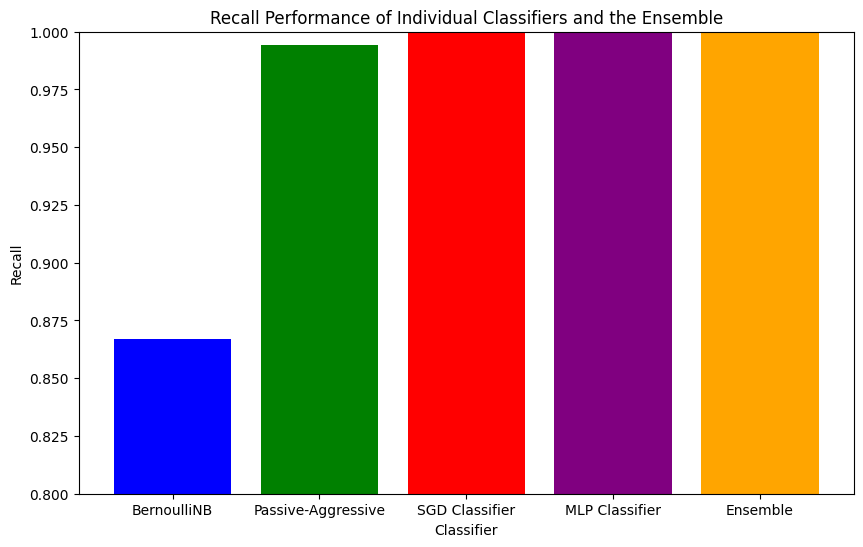

In [29]:
from sklearn.metrics import recall_score

# Define individual classifiers
clf1 = BernoulliNB()
clf2 = PassiveAggressiveClassifier(random_state=42)
clf3 = SGDClassifier(random_state=42)
clf4 = MLPClassifier(random_state=42)

# Define the ensemble model
ensemble = VotingClassifier(estimators=[
    ('bnb', clf1),
    ('pa', clf2),
    ('sgd', clf3),
    ('mlp', clf4)
], voting='hard')

# Train and evaluate individual classifiers for recall
classifiers = [clf1, clf2, clf3, clf4, ensemble]
classifier_names = ['BernoulliNB', 'Passive-Aggressive', 'SGD Classifier', 'MLP Classifier', 'Ensemble']

recall_scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)
    print(f'{clf.__class__.__name__} Recall: {recall:.4f}')

# Plot the recall scores
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, recall_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.title('Recall Performance of Individual Classifiers and the Ensemble')
plt.ylim(0.80, 1)
plt.show()


BernoulliNB F1 Score: 0.7792
BernoulliNB False Positive Rate: 0.3177
PassiveAggressiveClassifier F1 Score: 0.9971
PassiveAggressiveClassifier False Positive Rate: 0.0000
SGDClassifier F1 Score: 0.9938
SGDClassifier False Positive Rate: 0.0109
MLPClassifier F1 Score: 1.0000
MLPClassifier False Positive Rate: 0.0000
VotingClassifier F1 Score: 0.9999
VotingClassifier False Positive Rate: 0.0000


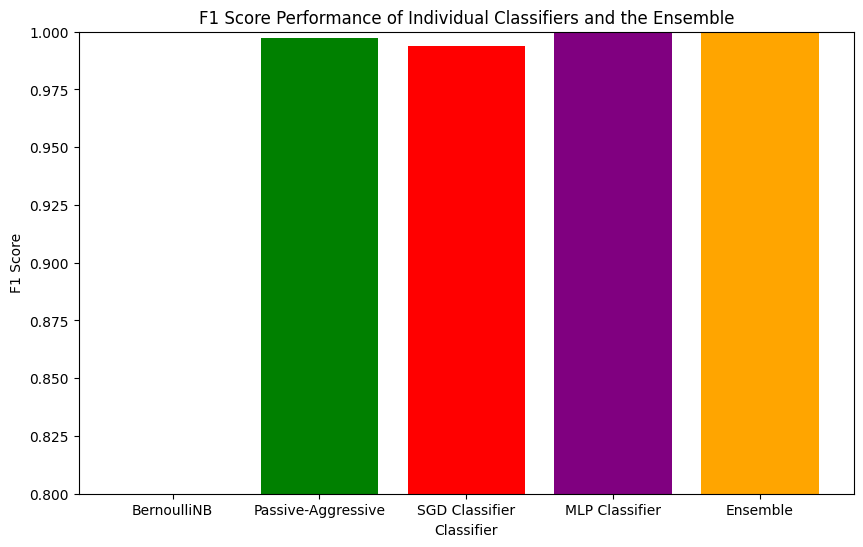

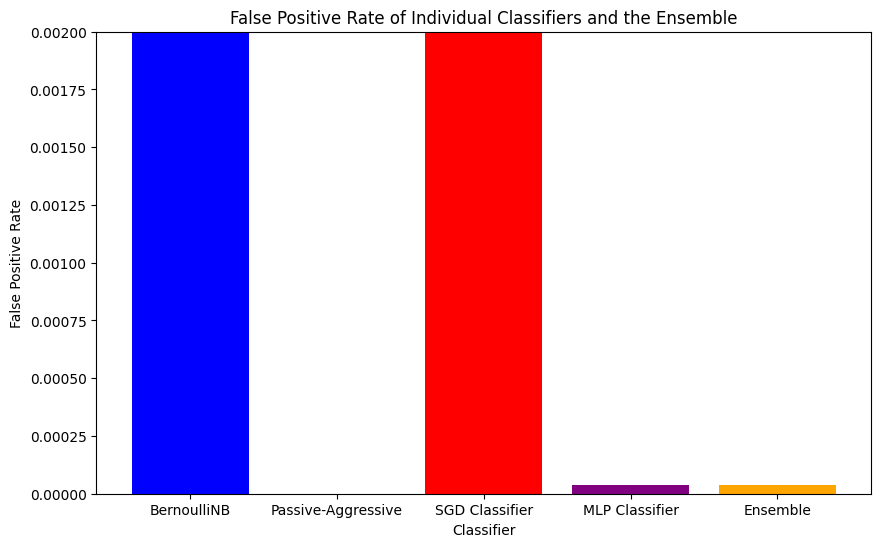

In [30]:
from sklearn.metrics import f1_score, confusion_matrix

# Define individual classifiers
clf1 = BernoulliNB()
clf2 = PassiveAggressiveClassifier(random_state=42)
clf3 = SGDClassifier(random_state=42)
clf4 = MLPClassifier(random_state=42)

# Define the ensemble model
ensemble = VotingClassifier(estimators=[
    ('bnb', clf1),
    ('pa', clf2),
    ('sgd', clf3),
    ('mlp', clf4)
], voting='hard')

# Train and evaluate individual classifiers for F1 score and confusion matrix for false positive rate
classifiers = [clf1, clf2, clf3, clf4, ensemble]
classifier_names = ['BernoulliNB', 'Passive-Aggressive', 'SGD Classifier', 'MLP Classifier', 'Ensemble']

f1_scores = []
false_positive_rates = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f'{clf.__class__.__name__} F1 Score: {f1:.4f}')

    # Calculate confusion matrix to extract false positives
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    false_positive_rate = fp / (fp + tn)
    false_positive_rates.append(false_positive_rate)
    print(f'{clf.__class__.__name__} False Positive Rate: {false_positive_rate:.4f}')

# Plot the F1 scores
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, f1_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.title('F1 Score Performance of Individual Classifiers and the Ensemble')
plt.ylim(0.80, 1)
plt.show()

# Plot the false positive rates
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, false_positive_rates, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Classifier')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate of Individual Classifiers and the Ensemble')
plt.ylim(0, 0.002)
plt.show()


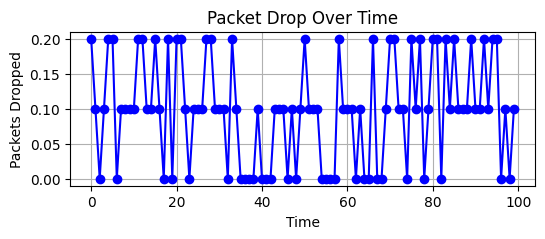

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected data
data = {
    "Category": ['RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT', 'RTT'],
    "Packets_Sent": [7.50, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00],
    "Packets_Dropped": [0.20, 0.10, 0.00, 0.10, 0.20, 0.20, 0.00, 0.10, 0.10, 0.10, 0.10, 0.20, 0.20, 0.10, 0.10, 0.20, 0.10, 0.00, 0.20, 0.00, 0.20, 0.20, 0.10, 0.00, 0.10, 0.10, 0.10, 0.20, 0.20, 0.10, 0.10, 0.10, 0.00, 0.20, 0.10, 0.00, 0.00, 0.00, 0.00, 0.10, 0.00, 0.00, 0.00, 0.10, 0.10, 0.10, 0.00, 0.10, 0.00, 0.10, 0.20, 0.10, 0.10, 0.10, 0.00, 0.00, 0.00, 0.00, 0.20, 0.10, 0.10, 0.10, 0.00, 0.10, 0.00, 0.00, 0.20, 0.00, 0.00, 0.10, 0.20, 0.20, 0.10, 0.10, 0.00, 0.20, 0.10, 0.20, 0.00, 0.10, 0.20, 0.20, 0.00, 0.20, 0.10, 0.20, 0.10, 0.10, 0.10, 0.20, 0.10, 0.10, 0.20, 0.10, 0.20, 0.20, 0.00, 0.10, 0.00, 0.10]
}

# Ensure all lists in the data dictionary have the same length
assert len(data["Category"]) == len(data["Packets_Sent"]) == len(data["Packets_Dropped"]), "All lists must be of the same length"

df = pd.DataFrame(data)

# Packet Drop Graph
plt.figure(figsize=(6, 2))
plt.plot(df.index, df['Packets_Dropped'], marker='o', linestyle='-', color='b')
plt.title('Packet Drop Over Time')
plt.xlabel('Time')
plt.ylabel('Packets Dropped')
plt.grid(True)
plt.show()


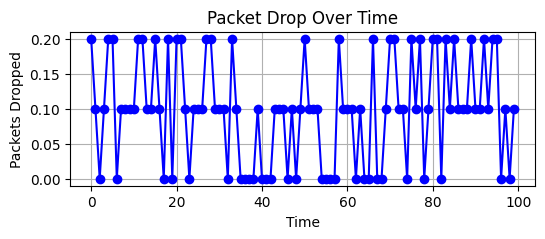

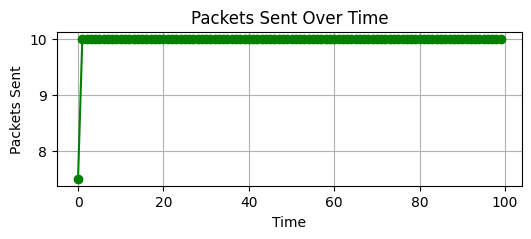

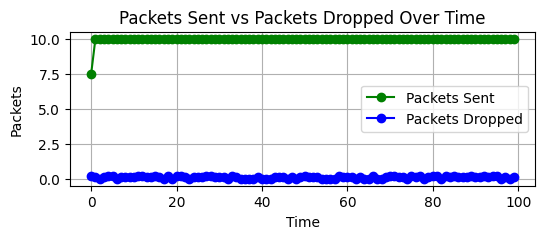

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Corrected data
data = {
    "Category": ['RTT'] * 100,
    "Packets_Sent": [7.50, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00, 10.00],
    "Packets_Dropped": [0.20, 0.10, 0.00, 0.10, 0.20, 0.20, 0.00, 0.10, 0.10, 0.10, 0.10, 0.20, 0.20, 0.10, 0.10, 0.20, 0.10, 0.00, 0.20, 0.00, 0.20, 0.20, 0.10, 0.00, 0.10, 0.10, 0.10, 0.20, 0.20, 0.10, 0.10, 0.10, 0.00, 0.20, 0.10, 0.00, 0.00, 0.00, 0.00, 0.10, 0.00, 0.00, 0.00, 0.10, 0.10, 0.10, 0.00, 0.10, 0.00, 0.10, 0.20, 0.10, 0.10, 0.10, 0.00, 0.00, 0.00, 0.00, 0.20, 0.10, 0.10, 0.10, 0.00, 0.10, 0.00, 0.00, 0.20, 0.00, 0.00, 0.10, 0.20, 0.20, 0.10, 0.10, 0.00, 0.20, 0.10, 0.20, 0.00, 0.10, 0.20, 0.20, 0.00, 0.20, 0.10, 0.20, 0.10, 0.10, 0.10, 0.20, 0.10, 0.10, 0.20, 0.10, 0.20, 0.20, 0.00, 0.10, 0.00, 0.10]
}

# Ensure all lists in the data dictionary have the same length
assert len(data["Category"]) == len(data["Packets_Sent"]) == len(data["Packets_Dropped"]), "All lists must be of the same length"

df = pd.DataFrame(data)

# Packet Drop Graph
plt.figure(figsize=(6, 2))
plt.plot(df.index, df['Packets_Dropped'], marker='o', linestyle='-', color='b')
plt.title('Packet Drop Over Time')
plt.xlabel('Time')
plt.ylabel('Packets Dropped')
plt.grid(True)
plt.show()

# Packet Sent Graph
plt.figure(figsize=(6, 2))
plt.plot(df.index, df['Packets_Sent'], marker='o', linestyle='-', color='g')
plt.title('Packets Sent Over Time')
plt.xlabel('Time')
plt.ylabel('Packets Sent')
plt.grid(True)
plt.show()

# Packet Sent vs Packet Drop Graph
plt.figure(figsize=(6, 2))
plt.plot(df.index, df['Packets_Sent'], marker='o', linestyle='-', color='g', label='Packets Sent')
plt.plot(df.index, df['Packets_Dropped'], marker='o', linestyle='-', color='b', label='Packets Dropped')
plt.title('Packets Sent vs Packets Dropped Over Time')
plt.xlabel('Time')
plt.ylabel('Packets')
plt.legend()
plt.grid(True)
plt.show()
